In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_regression
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
municipios = pd.read_csv('mun_cbba/Mun_Cbba2.csv', sep=';', decimal=',')

In [10]:
modelo = smf.ols(formula="tmi ~ anfe + purb", data=municipios).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tmi   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     54.26
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.02e-12
Time:                        03:06:20   Log-Likelihood:                -168.20
No. Observations:                  44   AIC:                             342.4
Df Residuals:                      41   BIC:                             347.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1012      8.306      4.106      0.0

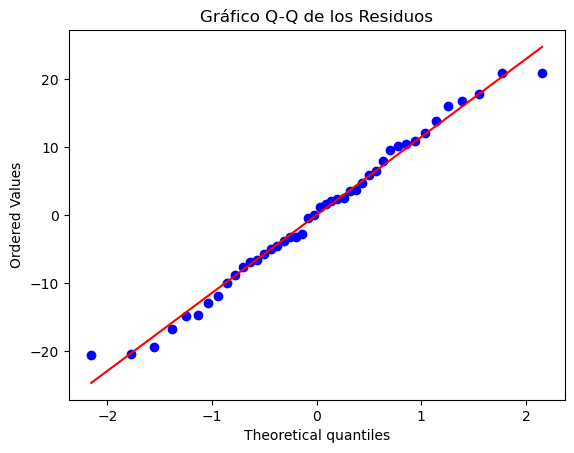

In [11]:
residuos = modelo.resid
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()

In [12]:
stat, p_value = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-value:', p_value)

Estadístico de Shapiro-Wilk: 0.9795819888314098
p-value: 0.6169840241066836


In [13]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tmi   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     54.26
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.02e-12
Time:                        03:06:34   Log-Likelihood:                -168.20
No. Observations:                  44   AIC:                             342.4
Df Residuals:                      41   BIC:                             347.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1012      8.306      4.106      0.0

Del resultado el modelo considerando los coeficientes se obtiene que el modelo es:
$$
\text{TMI} = 34.1012 + 1.3292 \cdot \text{anfe} + 0.0505 \cdot \text{purb}
$$

Se realiza una evaluación teórica.

Se planteó que las condiciones de vida y el grado de urbanización implicaban un impacto sobre la mortalidad infantil:

a) Mayor tasa de analfabetismo femenino (anfe) implica una mayor tasa de mortalidad infantil. El signo del coeficiente debe ser positivo. En el modelo estimado, el coeficiente de anfe anfe es  1.3292 1.3292, lo cual es consistente con la teoría. Este coeficiente es estadísticamente significativo ( 𝑝 < 0.001 p<0.001), lo que indica que existe evidencia empírica para concluir que el analfabetismo femenino tiene un impacto positivo y significativo sobre la mortalidad infantil.

b) Mayor porcentaje de población urbana (purb) implica una mayor tasa de mortalidad infantil. El signo del coeficiente también debe ser positivo. En el modelo estimado, el coeficiente de purb purb es  0.0505 0.0505, pero este valor no es estadísticamente significativo ( 𝑝 = 0.588 > 0.05 p=0.588>0.05). Esto sugiere que no hay evidencia empírica suficiente para concluir que el grado de urbanización afecta significativamente la mortalidad infantil.

El modelo estimado constituye una evidencia empírica parcial de la teoría planteada en el primer paso: mientras que el analfabetismo femenino demuestra ser un factor significativo, el grado de urbanización no tiene un impacto concluyente en este caso.



##### i) Evaluacion de la bondad de ajuste

En este ejemplo, el indicador es 𝑅 2 = 0.726 R2=0.726, lo que significa que el 72.6% de la variabilidad de la mortalidad infantil está explicada por la asociación lineal con el analfabetismo femenino ( anfe anfe) y el grado de urbanización ( purb). El restante 27.4% se debe a otros factores no considerados en este modelo.

### F-Statistic (Probabilidad):
El modelo general es significativo

### Durbin-Watson (1.266 1.266):
Indica una ligera autocorrelación en los residuos, aunque no crítica.


## Conclusiones
Conclusiones:

anfe
Tiene un impacto significativo y positivo en la TMI. Esto respalda la hipótesis de que el analfabetismo femenino afecta la mortalidad infantil.

purb (grado de urbanización):
No tiene un impacto estadísticamente significativo en este modelo. Esto podría indicar que el grado de urbanización no es un factor relevante para explicar la TMI en este conjunto de datos.